# $K$-Means Clustering and Principal Component Analysis with scikit-learn

In [1]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

## $K$-Means Clustering

### Read Data

In [2]:
# Read data
data1 = loadmat('data/ex7data2.mat')
X1 = data1['X']

### Run $K$-Means

In [3]:
# Perform k-means clustering:
from sklearn.cluster import KMeans

# Define k-means model with K = 3
km1_model = KMeans(3)
km1_model.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Results

In [4]:
def plot_data_points(X, idx):
    plt.scatter(X[:,0], X[:,1], c=idx.ravel(), cmap=plt.cm.prism, edgecolors='k', linewidths=.5, s=40)

In [5]:
# Function to plot data and centroids
def plot_kmeans_result(X, centroids, idx):
    plot_data_points(X, idx)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=100, c='k', linewidth=2)

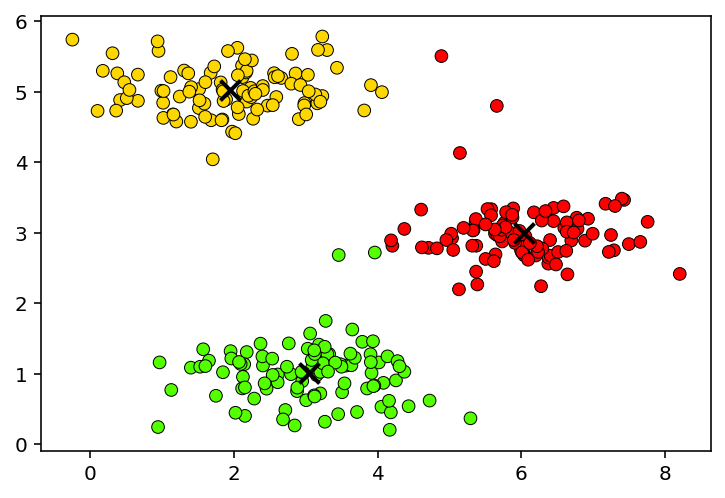

In [6]:
# Visualize resulting clustered data:
plot_kmeans_result(X1, km1_model.cluster_centers_, km1_model.labels_)

## Image Compression with $K$-means

### Read Data

In [7]:
# We read the test image
img = plt.imread('data/bird_small.png')
img_shape = img.shape
print(img_shape)

(128, 128, 3)


### Visualize Data

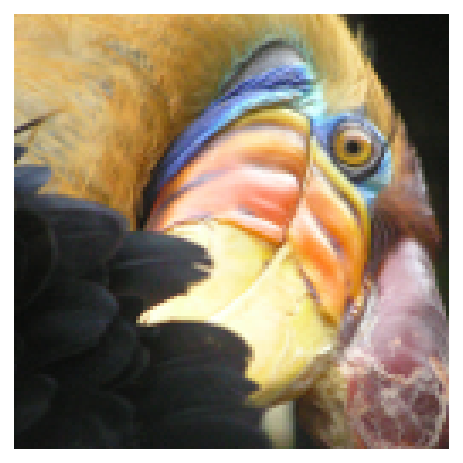

In [8]:
# Show original image
plt.imshow(img)
plt.axis('off')
plt.show()

### Preprocessing

In [9]:
# Normalize pixel color values (these are 8 bit integers (0 - 255))
A = img/255

# Reshape A into matrix by unrolling pixel grid:
X2 = A.reshape(img_shape[0] * img_shape[1], img_shape[2])
print(X2.shape)

(16384, 3)


### Run $K$-Means

In [10]:
# Define k-means model with K = 16
km2_model = KMeans(16)
km2_model.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Results

In [11]:
# Map each pxiel to its assigned centroid, undo normalization and 
# reshape the calculated centroids into the final compressed image data-tensor:
img_compressed = km2_model.cluster_centers_[km2_model.labels_].reshape(img_shape) * 255
print(img_compressed.shape)

(128, 128, 3)


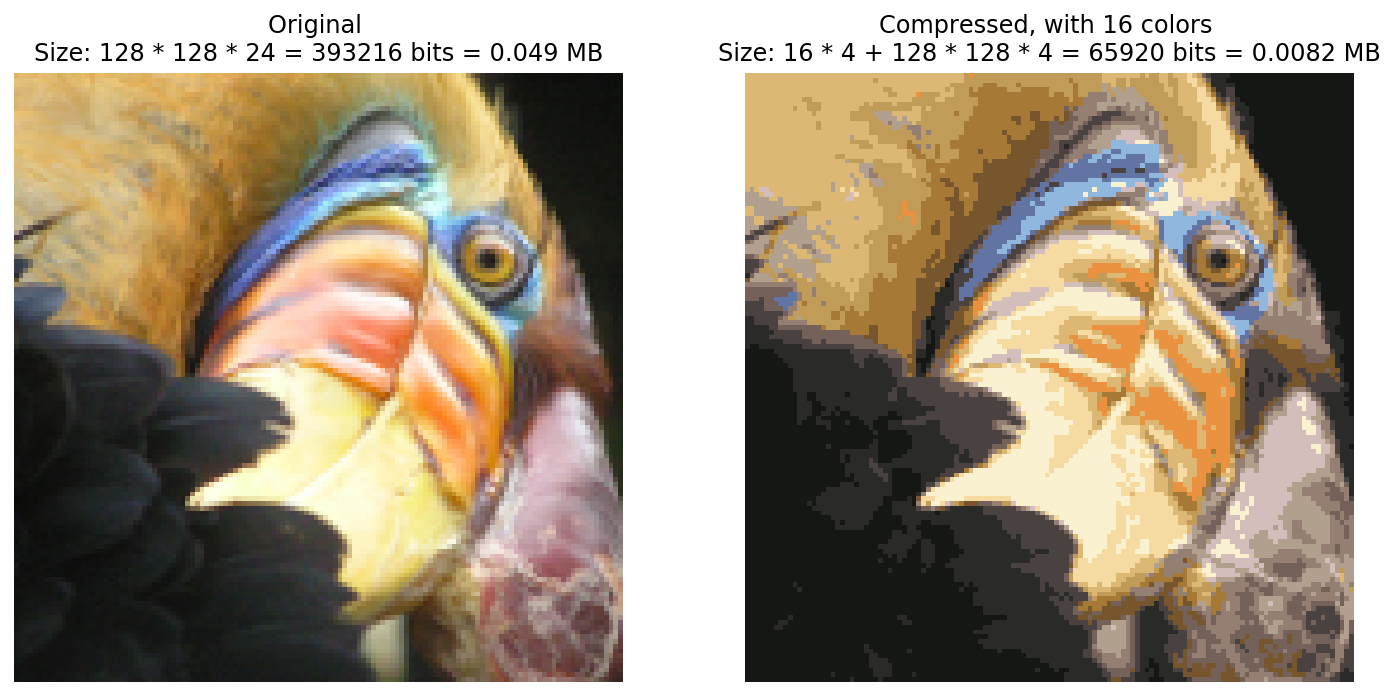

In [12]:
# Show original and compressed image side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,9))
ax1.imshow(img)
ax1.set_title('Original \nSize: 128 * 128 * 24 = 393216 bits = 0.049 MB')
ax2.imshow(img_compressed)
ax2.set_title('Compressed, with 16 colors \nSize: 16 * 4 + 128 * 128 * 4 = 65920 bits = 0.0082 MB')

for ax in fig.axes:
    ax.axis('off')

## Principle Component Analysis

### Read Data

In [13]:
# Load data
data3 = loadmat('data/ex7data1.mat')
X3 = data3['X']
print(X3.shape)

(50, 2)


### Plot Data

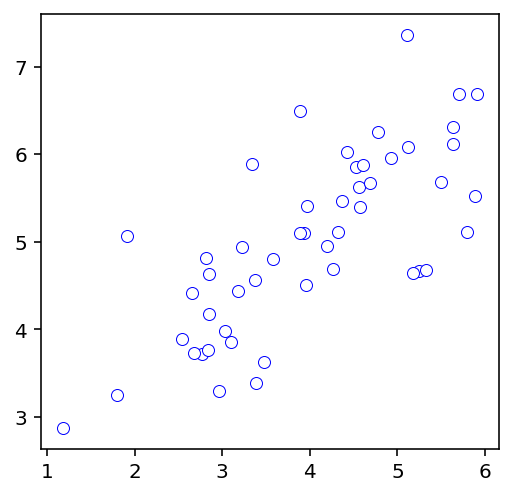

In [14]:
# Visualize data
plt.scatter(X3[:,0], X3[:,1], c='w', edgecolors='b', linewidths=0.5)
plt.gca().set_aspect('equal')
plt.show()

### Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler

# Feature scale data:
X3_norm = StandardScaler().fit_transform(X3)

### Run PCA (keeping all components)

In [16]:
from sklearn.decomposition import PCA

# Define decomposition, notice for visualization we keep all eigenvectors
pca_dec = PCA(svd_solver='full')

# Fit model
pca_dec.fit(X3_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

#### Results

In [17]:
# Show principle component direction vectors (= eigenvectors in SVD of covariance matrix)
U = pca_dec.components_
mu = np.mean(X3, axis=0)
print(U)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [18]:
# Show singular values
S = pca_dec.singular_values_
print(S)

[9.3153915  3.63641048]


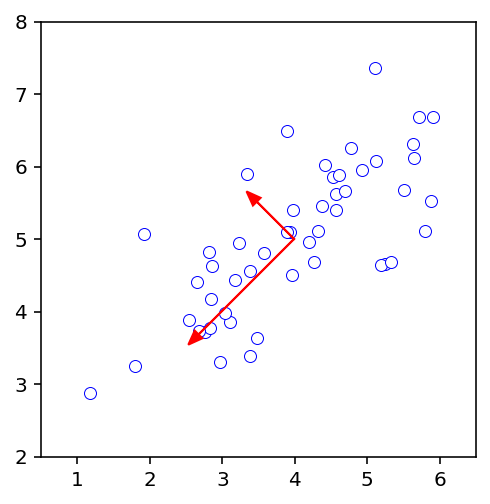

In [19]:
# Plot results:
fig, ax = plt.subplots()
ax.scatter(X3[:,0], X3[:,1], c='w', edgecolors='b', linewidths=0.5)

ax.arrow(mu[0], mu[1], 0.2 *S[0] * U[0, 0], 0.2 * S[0] * U[1, 0], head_width=0.15, head_length=0.2, fc='r', ec='r')
ax.arrow(mu[0], mu[1], 0.2 * S[1] * U[0, 1], 0.2 * S[1] * U[1, 1], head_width=0.15, head_length=0.2, fc='r', ec='r')

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

### Run PCA (keeping 1 component)

In [20]:
# Define decomposition, now we want to project onto 1d space: K =1 
pca_decK1 = PCA(svd_solver='full', n_components=1)

# Fit model
pca_decK1.fit(X3_norm)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

#### Results

In [21]:
# Project data onto 1 principle compenent vector:
Z3 = pca_decK1.transform(X3_norm)

# Print sample value:
print(Z3[0])

[1.49631261]


In [22]:
# Recover approximation of data by back projection onto the original space:
X3_rec = pca_decK1.inverse_transform(Z3)
X3_rec[0,:]

array([-1.05805279, -1.05805279])

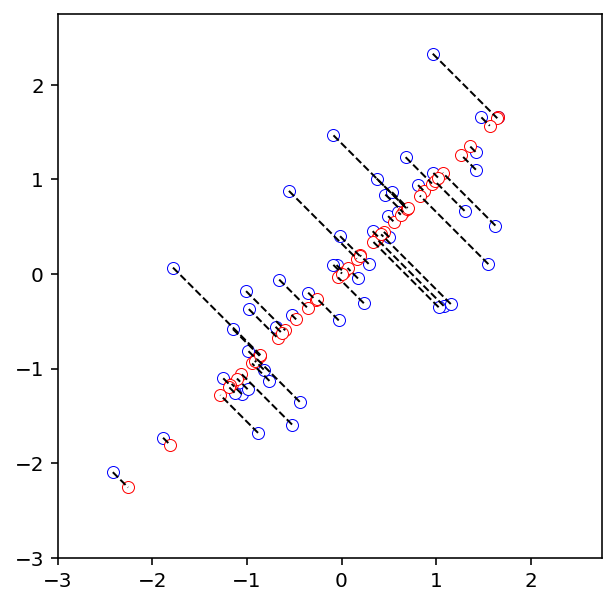

In [23]:
# Visualize the projections (original data = blue, projected data = red):
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X3_norm[:,0], X3_norm[:,1], c='w', edgecolors='b', linewidths=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

ax.scatter(X3_rec[:,0], X3_rec[:,1], c='w', edgecolors='r', linewidths=0.5)

for xnorm, xrec in zip(X3_norm, X3_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

## PCA on Face Image Dataset

### Read Data

In [24]:
## Face image dataset:
# Load data
data4 = loadmat('data/ex7faces.mat')
X4 = data4['X']
# Rows are unrolled 32x32 size greyscale images
print(X4.shape)

(5000, 1024)


### Visualize Data

In [25]:
# Function to plot an nr_examples x nr_examples grid of random images of the data set
def display_data(X, nr_examples, rd=True):
    m, n = X.shape
    example_width = int(np.round(np.sqrt(n)))
    example_height = n // example_width
    
    display_rows = int(np.floor(np.sqrt(nr_examples)))
    display_cols = int(np.ceil(nr_examples / display_rows))
    
    _, axarr = plt.subplots(display_rows, display_cols, figsize=(display_rows, display_cols))
    
    for i in range(display_rows):
        for j in range(display_cols):
            if rd == True:
                axarr[i,j].imshow(X[np.random.randint(m)].reshape(example_width, example_height, order = 'F'), cmap='gray')
            else:
                axarr[i,j].imshow(X[j + display_cols * i].reshape(example_width, example_height, order = 'F'), cmap='gray')
            axarr[i,j].axis('off')

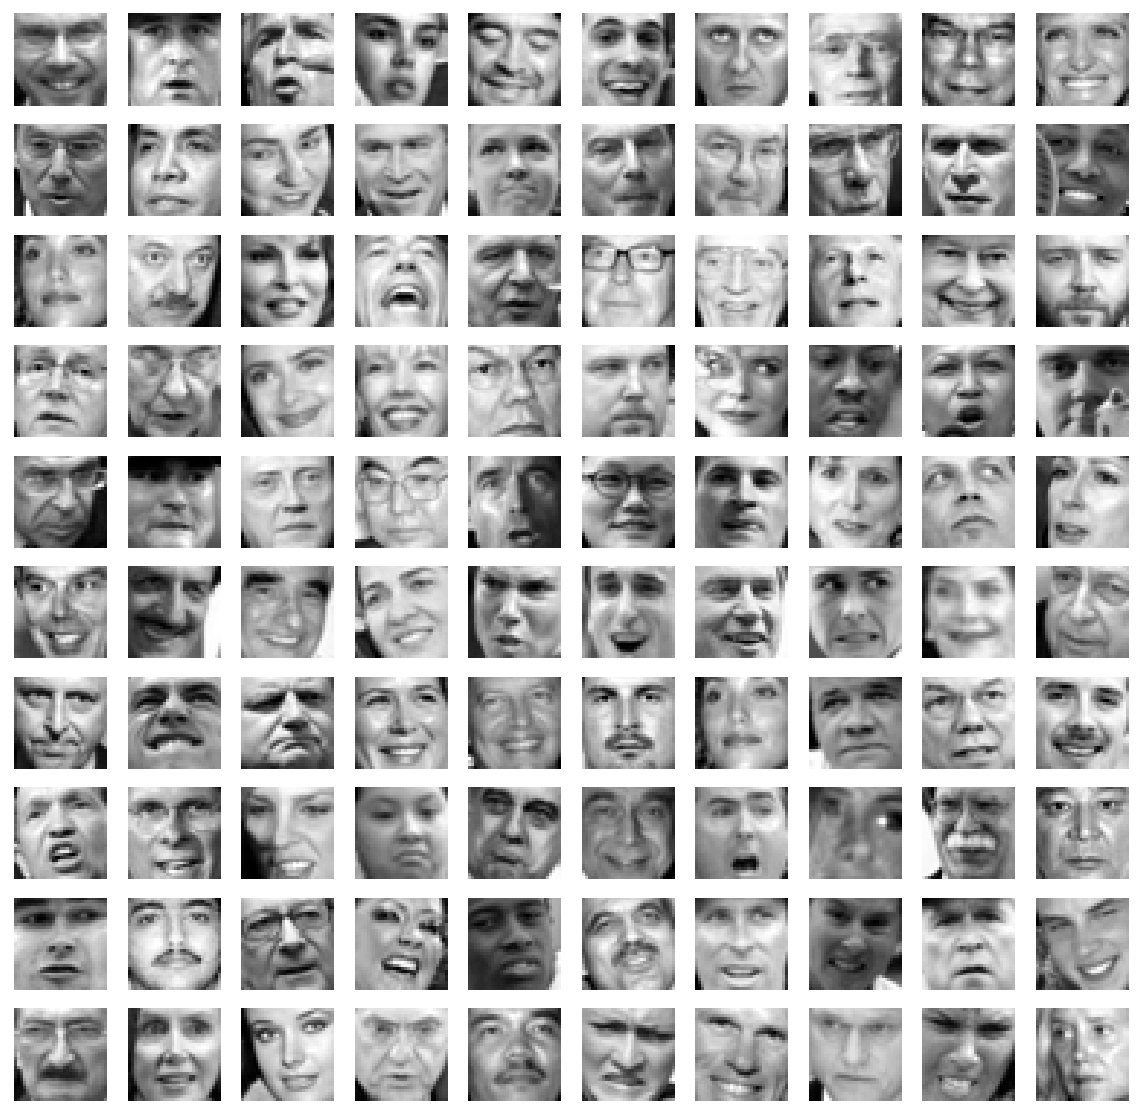

In [26]:
# Show some sample images
display_data(X4, 100)

### Preprocessing

In [27]:
# Perform feature scaling before doing PCA:
X4_norm = StandardScaler().fit_transform(X4)

### Run PCA (keeping all components)

In [28]:
# Define decomposition, for visualization we compute all singular vectors first
pca_dec2 = PCA(svd_solver='full')

# Fit model
pca_dec2.fit(X4_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

#### Results

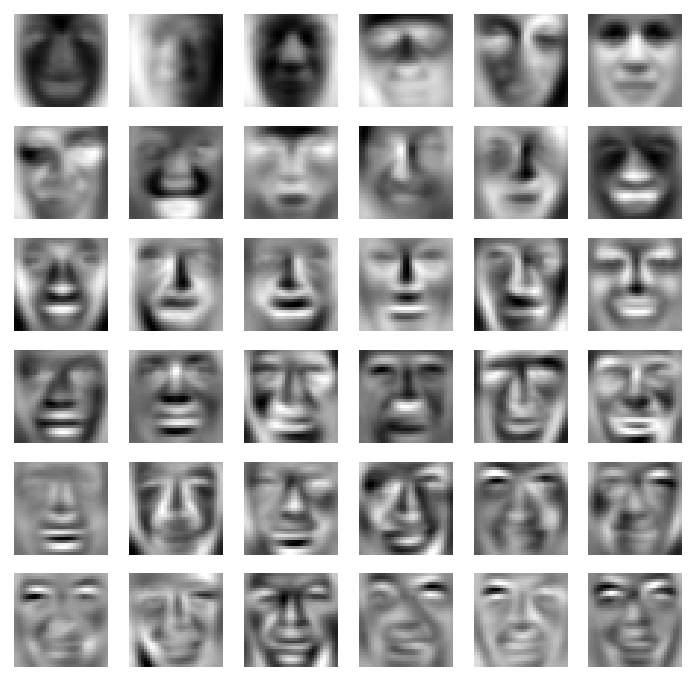

In [29]:
# We can visualize the principle components by reshaping the rows of U4 into 32x32 images:
# Show the first 36 principle components
display_data(pca_dec2.components_, 36, rd=False)

### Run PCA (keeping 100 components)

In [30]:
# Define decomposition, now project onto 100 principle components
pca_dec2K100 = PCA(svd_solver='full', n_components=100)

# Fit model
pca_dec2K100.fit(X4_norm)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

#### Results

In [31]:
# Project data onto the calculated principle component vectors:
Z4 = pca_dec2K100.transform(X4_norm)

In [32]:
# Recover an approximation of the original data from the projections:
X4_rec = pca_dec2K100.inverse_transform(Z4)

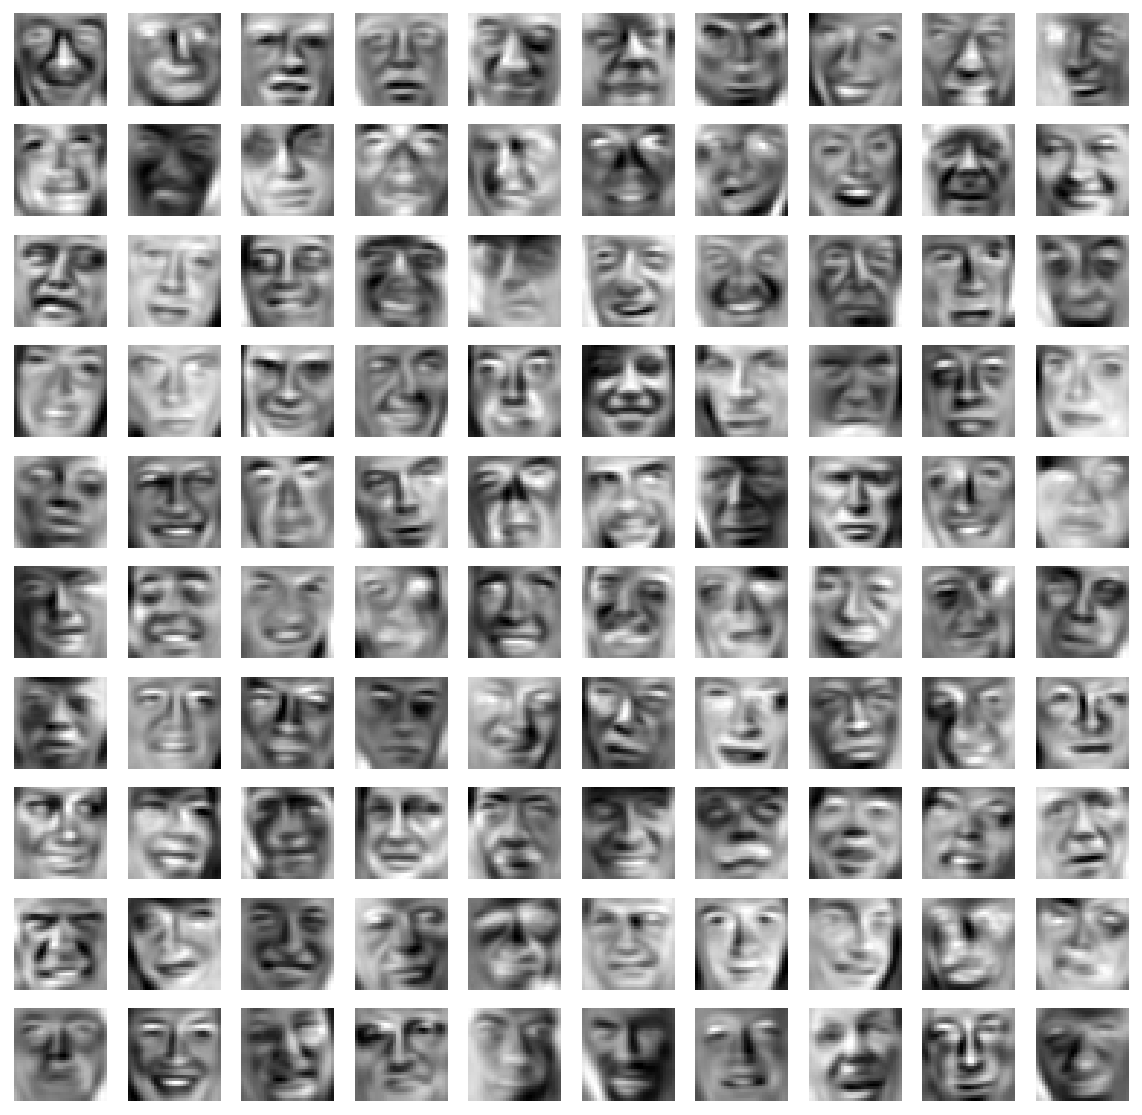

In [33]:
# Show the recovered data of the first 100 faces
display_data(X4_rec, 100, rd=False)

## PCA for Data Visualization

In [34]:
# Function that plots data points in 3d space and colors them according to their assignment to different centroids
from mpl_toolkits.mplot3d import Axes3D

def plot_data_points_3d(X, idx):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=idx.ravel(), cmap=plt.cm.hsv, s=.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

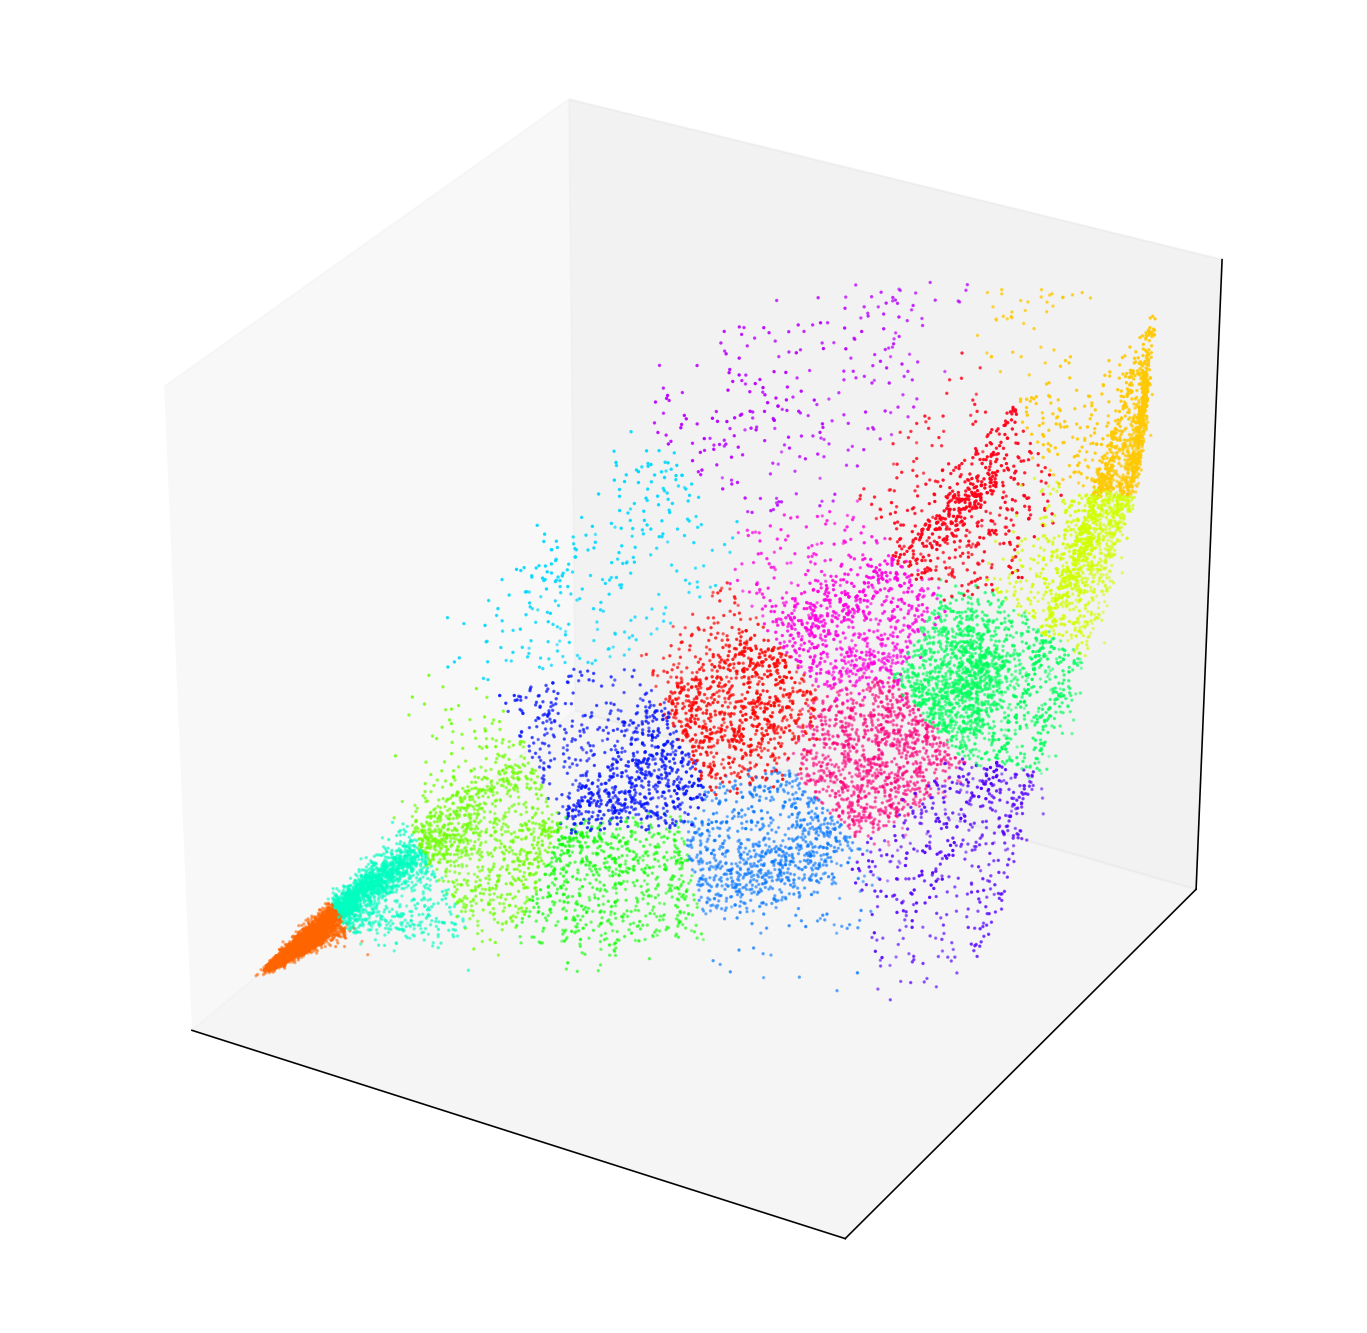

In [35]:
# Visualize clustered data from bird image
plot_data_points_3d(X2, km2_model.labels_)

### Preprocessing

In [36]:
# Feature normalize:
X2_norm = StandardScaler().fit_transform(X2)

### Run PCA

In [37]:
# Define decomposition, now project onto 2 principle components for 2d plotting
pca_dec3 = PCA(svd_solver='full', n_components=2)

# Fit model
pca_dec3.fit(X2_norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

### Results

In [38]:
# Project data onto principle components:
Z2 = pca_dec3.transform(X2_norm)

In [39]:
# Visualize projected data in 2d:
# Function that plots the data points and colors them according to their assignment to different centroids
def plot_data_points_2(X, idx):
    plt.scatter(X[:,0], X[:,1], c=idx.ravel(), cmap=plt.cm.hsv, s=.1)

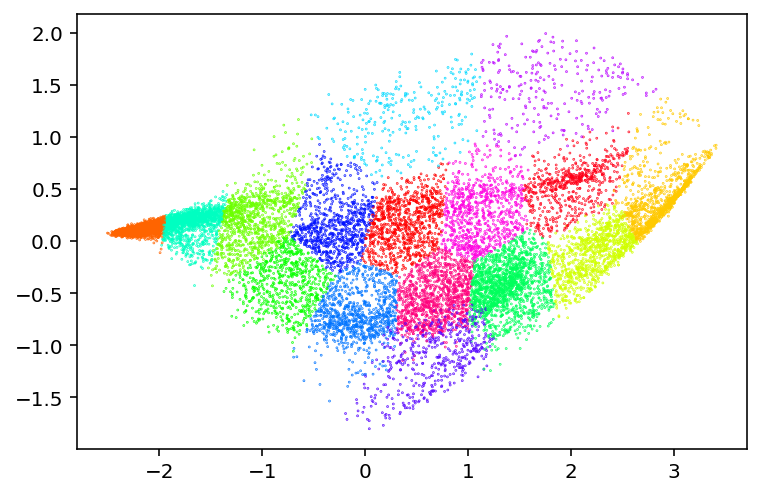

In [40]:
# Visualize projected data in 2d:
plot_data_points_2(Z2, km2_model.labels_)